<a href="https://colab.research.google.com/github/wangpouwei/Paul/blob/master/pca_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

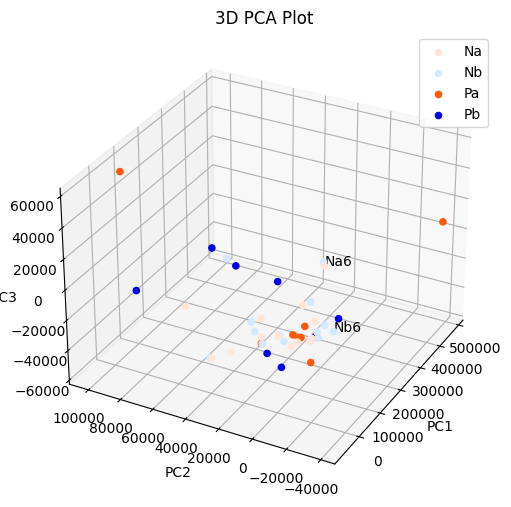

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

#### 讀取資料 ####
data = pd.read_csv('./165_original/pca_input_165_original.csv')

# 提取基因表現數據和Group資訊
gene_data = data.iloc[:, 2:]
groups = data['Group']

# 使用PCA進行降維
pca = PCA(n_components=3)
pca_result = pca.fit_transform(gene_data)

# 創建3D圖
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 根據Group進行著色
unique_groups = np.unique(groups)
colors = ['#FFE6D9', '#D2E9FF', '#FF5809', '#0000E3']  # 假設有四個不同的Group，可自行添加或更改顏色
for i, group in enumerate(unique_groups):
    idx = groups == group
    ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], c=colors[i], label=group, alpha=1)

# 在每個點的位置上標註 sample 名稱
for i, sample in enumerate(data['Sample']):
    if sample == 'Nb6' or sample == 'Na6':
        ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], sample, color='black')

# 設置觀看角度
for angle in range(70,210,2):
    ax.view_init(30,angle)  # elev為仰角，azim為方位角
    # 設置圖的標籤和標題
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('3D PCA Plot')
    # 顯示圖例
    ax.legend()
    filename='./165_original/pic_label/PCA_angle'+str(angle)+'.png'  #### 圖片存檔位置 ####
    plt.savefig(filename, dpi=120)



# 顯示圖形
plt.show()


In [ ]:
import numpy as np
import imageio
import os

def make_gif(input_folder, save_filepath):
    episode_frames = []
    time_per_step = 10
    for root, _, files in os.walk(input_folder):
        file_paths = [os.path.join(root, file) for file in files]
        #sorted by modified time
        file_paths = sorted(file_paths, key=lambda x: os.path.getmtime(x))
        episode_frames = [imageio.imread(file_path)
                          for file_path in file_paths if file_path.endswith('.png')]
    episode_frames = np.array(episode_frames)
    imageio.mimsave(save_filepath, episode_frames, duration=time_per_step)


make_gif('./165_original/pic_label/', './165_original/pic_label/pic.gif') #### gif存檔位置 ####

/tmp/ipykernel_21066/2102914551.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  episode_frames = [imageio.imread(file_path)
